# Predicción mediante técnicas de IA - Trabajo final - Cuaderno de análisis exploratorio y preprocesamiento de los datos

Realizado por

* Manuel Alejandro De la Rosa Gómez
* Diego Alejandro Campuzano Botero
* Gabriel Jaime Orrego Restrepo

Reglas generales:

1. Cada columna de valores, tiene una correspondiente columna de calidad
2. Si el valor es -9999, se considera valor faltante
3. Si la CALIDAD del valor es mayor a 4, se considera valor faltante

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats as stats
from preprocessing_functions import drop_serial_code, drop_nulls_columns

In [2]:
df=pd.read_csv('data/SIATA/12.csv')

# Descarte de filas con calidad baja

Se procede a descartar del dataset original proporcionado por el SIATA las variables que no contienen ningún valor válido y se recodifican los valores faltantes o no válidos

In [3]:
df.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [4]:
df = drop_serial_code(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61368 entries, 0 to 61367
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha_Hora            61368 non-null  object 
 1   pm25                  61368 non-null  float64
 2   calidad_pm25          61368 non-null  float64
 3   pm10                  61368 non-null  float64
 4   calidad_pm10          61368 non-null  float64
 5   pm1                   61368 non-null  float64
 6   calidad_pm1           61368 non-null  float64
 7   no                    61368 non-null  float64
 8   calidad_no            61368 non-null  float64
 9   no2                   61368 non-null  float64
 10  calidad_no2           61368 non-null  float64
 11  nox                   61368 non-null  float64
 12  calidad_nox           61368 non-null  float64
 13  ozono                 61368 non-null  float64
 14  calidad_ozono         61368 non-null  float64
 15  co                 

In [6]:
# # Replace -9999 with NaN
df.replace(-9999.0, pd.NA, inplace=True)

In [10]:
# Get the percentage of missing values by column
missing_values = df.isnull().mean() * 100

In [11]:
missing_values

Fecha_Hora               0.000000
pm25                     1.882088
calidad_pm25             0.019554
pm10                     2.219398
calidad_pm10             0.019554
calidad_pm1              0.019554
no                      25.291683
calidad_no               0.019554
no2                     25.291683
calidad_no2              0.019554
nox                     25.291683
calidad_nox              0.019554
calidad_ozono            0.019554
calidad_co               0.019554
so2                     51.559445
calidad_so2              0.019554
calidad_pst              0.019554
dviento_ssr             81.576718
calidad_dviento_ssr      0.019554
haire10_ssr             81.579977
calidad_haire10_ssr      0.019554
p_ssr                   81.575088
calidad_p_ssr            0.019554
pliquida_ssr            81.575088
calidad_pliquida_ssr     0.019554
calidad_rglobal_ssr      0.019554
taire10_ssr             81.575088
calidad_taire10_ssr      0.019554
vviento_ssr             81.690783
calidad_vvient

In [8]:
missing_values

Fecha_Hora                0.000000
pm25                      1.882088
calidad_pm25              0.019554
pm10                      2.219398
calidad_pm10              0.019554
pm1                     100.000000
calidad_pm1               0.019554
no                       25.291683
calidad_no                0.019554
no2                      25.291683
calidad_no2               0.019554
nox                      25.291683
calidad_nox               0.019554
ozono                   100.000000
calidad_ozono             0.019554
co                      100.000000
calidad_co                0.019554
so2                      51.559445
calidad_so2               0.019554
pst                     100.000000
calidad_pst               0.019554
dviento_ssr              81.576718
calidad_dviento_ssr       0.019554
haire10_ssr              81.579977
calidad_haire10_ssr       0.019554
p_ssr                    81.575088
calidad_p_ssr             0.019554
pliquida_ssr             81.575088
calidad_pliquida_ssr

In [9]:
df.sample(10)

,Fecha_Hora,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
14523,2019-10-27 03:00:00,45.0,1.0,995.0,4.2995,<NA>,1.0,7.1907,1.9,23.2489,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
29955,2023-12-01 03:00:00,31.0,1.0,61.0,1.0,<NA>,1.0,29.7532,1.0,17.1689,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
2542,2021-03-15 22:00:00,31.0,1.0,35.0,1.0,<NA>,1.0,33.5208,1.0,32.3081,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
41330,2021-04-19 02:00:00,18.0,1.0,28.0,1.0,<NA>,1.0,4.8375,1.0,8.1199,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
7951,2021-08-28 07:00:00,17.0,1.0,31.0,2.1,<NA>,1.0,41.417,1.0,17.3854,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
57329,2023-10-18 17:00:00,13.0,1.0,51.0,1.0,<NA>,1.0,23.3672,1.0,48.6798,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
31792,2023-03-16 16:00:00,17.0,1.0,49.0,1.0,<NA>,1.0,11.2762,1.0,37.5684,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
11815,2019-04-06 07:00:00,54.0,2.6,52.0,2.6,<NA>,1.0,<NA>,1.0,<NA>,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
25753,2021-02-08 01:00:00,25.0,1.0,38.0,1.0,<NA>,1.0,2.3994,1.0,8.0897,...,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0,<NA>,1.0
23155,2025-01-20 19:00:00,32.0,2.6,31.0,2.6,<NA>,1.0,<NA>,4.31,<NA>,...,637.241,1.0,0.0,1.0,<NA>,1.0,23.859,1.0,0.456,1.0


In [9]:
df = drop_nulls_columns(df)

In [11]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'pm10', 'calidad_pm10',
       'calidad_pm1', 'no', 'calidad_no', 'no2', 'calidad_no2', 'nox',
       'calidad_nox', 'calidad_ozono', 'calidad_co', 'so2', 'calidad_so2',
       'calidad_pst', 'dviento_ssr', 'calidad_dviento_ssr', 'haire10_ssr',
       'calidad_haire10_ssr', 'p_ssr', 'calidad_p_ssr', 'pliquida_ssr',
       'calidad_pliquida_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [10]:
# Drop columns with more than 10% missing values
columns_to_drop = missing_values[missing_values > 10].index

df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'pm10', 'calidad_pm10',
       'calidad_pm1', 'calidad_no', 'calidad_no2', 'calidad_nox',
       'calidad_ozono', 'calidad_co', 'calidad_so2', 'calidad_pst',
       'calidad_dviento_ssr', 'calidad_haire10_ssr', 'calidad_p_ssr',
       'calidad_pliquida_ssr', 'calidad_rglobal_ssr', 'calidad_taire10_ssr',
       'calidad_vviento_ssr'],
      dtype='object')

In [13]:
# There are two types of columns: those with measurements and those with values for the quality of the measurements.
# The columns with values for the quality of the measurements have the same name as the columns with the measurements, but with the prefix 'calidad_'.
# If the dataset has only the columns with the quality of the measurements, but not the columns with the measurements, then the columns with the quality of the measurements are dropped.

# Get the columns with measurements
columns_with_measurements = df.columns[~df.columns.str.startswith('calidad_')]

# Get the columns with the quality of the measurements
columns_with_quality = df.columns[df.columns.str.startswith('calidad_')]

# Find the columns with quality of the measurements that have a corresponding column with measurements
columns_with_quality_and_measurements = columns_with_quality.str.replace('calidad_', '').isin(columns_with_measurements)

# Drop the columns with the quality of the measurements that do not have a corresponding column with measurements
columns_with_quality_to_drop = columns_with_quality[~columns_with_quality_and_measurements]

df.drop(columns_with_quality_to_drop, axis=1, inplace=True)

In [14]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'pm10', 'calidad_pm10'], dtype='object')

In [15]:
df.shape

(61368, 5)

In [16]:
df.isna().sum()

Fecha_Hora         0
pm25            1155
calidad_pm25      12
pm10            1362
calidad_pm10      12
dtype: int64

In [14]:
df

,Fecha_Hora,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2019-06-01 00:00:00,23.0,1.0,33.0,1.0,-9999.0,1.0,-9999.0000,1.0,-9999.0000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2019-06-01 01:00:00,32.0,1.0,41.0,1.0,-9999.0,1.0,-9999.0000,1.0,-9999.0000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2019-06-01 02:00:00,4.0,2.1,9.0,2.1,-9999.0,1.0,-9999.0000,1.0,-9999.0000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2019-06-01 03:00:00,-2.0,3.0,15.0,2.1,-9999.0,1.0,-9999.0000,1.0,-9999.0000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2019-06-01 04:00:00,17.0,2.6,9.0,2.6,-9999.0,1.0,-9999.0000,1.0,-9999.0000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,2022-10-31 19:00:00,18.0,1.0,25.0,2.1,-9999.0,1.0,23.8474,1.0,31.9665,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
61364,2022-10-31 20:00:00,28.0,1.0,38.0,1.0,-9999.0,1.0,76.8295,1.0,38.2181,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
61365,2022-10-31 21:00:00,39.0,1.0,61.0,1.0,-9999.0,1.0,106.3240,1.0,38.6028,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
61366,2022-10-31 22:00:00,41.0,1.0,63.0,1.0,-9999.0,1.0,67.0949,1.0,29.2902,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [15]:
df_pm25=df[['Fecha_Hora','pm25', 'calidad_pm25']]

In [16]:
df_pm25[df_pm25['calidad_pm25']>=4]

,Fecha_Hora,pm25,calidad_pm25
299,2019-06-13 11:00:00,-9999.0,4.3100
300,2019-06-13 12:00:00,-9999.0,4.3100
301,2019-06-13 13:00:00,-9999.0,4.3100
302,2019-06-13 14:00:00,-9999.0,4.3100
470,2019-06-20 14:00:00,985.0,4.2985
...,...,...,...
60734,2022-10-05 14:00:00,-9999.0,4.3100
60875,2022-10-11 11:00:00,985.0,4.2985
60902,2022-10-12 14:00:00,-9999.0,4.3100
60903,2022-10-12 15:00:00,985.0,4.2985


In [17]:
# Summarize the data
df.describe()

,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,calidad_no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.0,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,...,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,-154.994680,-0.753954,-162.863984,-0.726150,-9999.0,-0.955417,-2509.301004,-0.579860,-2512.373851,-0.608166,...,-8040.278645,-0.412838,-8156.678911,-0.499250,-9580.175277,-0.499315,-8152.459225,-0.499380,-8168.171757,-0.495550
std,1366.032944,139.827984,1485.923064,139.828584,0.0,139.823675,4357.913166,139.831891,4356.072353,139.831365,...,4121.583038,139.836257,3876.545866,139.834708,2020.831288,139.834707,3885.425271,139.834706,3867.254846,139.834792
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,17.000000,1.000000,32.000000,1.000000,-9999.0,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,...,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000
50%,24.000000,1.000000,45.000000,1.000000,-9999.0,1.000000,11.169350,1.000000,16.747500,1.000000,...,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000
75%,33.000000,1.000000,60.000000,1.000000,-9999.0,1.000000,28.642425,1.000000,25.055600,1.000000,...,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.000000,1.000000
max,995.000000,4.310000,995.000000,4.310000,-9999.0,1.000000,934.504000,4.310000,125.845000,4.310000,...,643.539000,4.310000,17.400000,4.310000,926.566000,4.310000,34.393000,4.310000,2.150420,4.310000


In [18]:
# Percentage of data with 'pm25' = -9999
(df['pm25'] == -9999).sum() / len(df) * 100

np.float64(1.8820883848259677)

In [19]:
# Group data by 'calidad_pm25', count the number of records and show as percentage of total
df_grouped=df.groupby('calidad_pm25').size().reset_index(name='counts')

df_grouped['percentage'] = df_grouped['counts']/df_grouped['counts'].sum()*100

In [20]:
df_grouped

,calidad_pm25,counts,percentage
0,-9999.0000,12,0.019554
1,1.0000,54735,89.191435
2,2.0000,18,0.029331
3,2.1000,2169,3.534415
4,2.2000,206,0.335680
5,2.3000,592,0.964672
6,2.4000,12,0.019554
7,2.5000,88,0.143397
8,2.6000,1069,1.741950
9,3.0000,174,0.283535


In [21]:
#elegir las columnas del analisis, en si los datos que se van a usar y no la calidad de los datos
columnas_filtradas= [col for col in df.columns if "calidad" not in col]
df_nuevo = df[columnas_filtradas]

In [22]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'pm10', 'pm1', 'no', 'no2', 'nox', 'ozono', 'co',
       'so2', 'pst', 'dviento_ssr', 'haire10_ssr', 'p_ssr', 'pliquida_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'],
      dtype='object')

# Llenado de nulos

Inicialmente se visualizan los datos crudos con histogramas

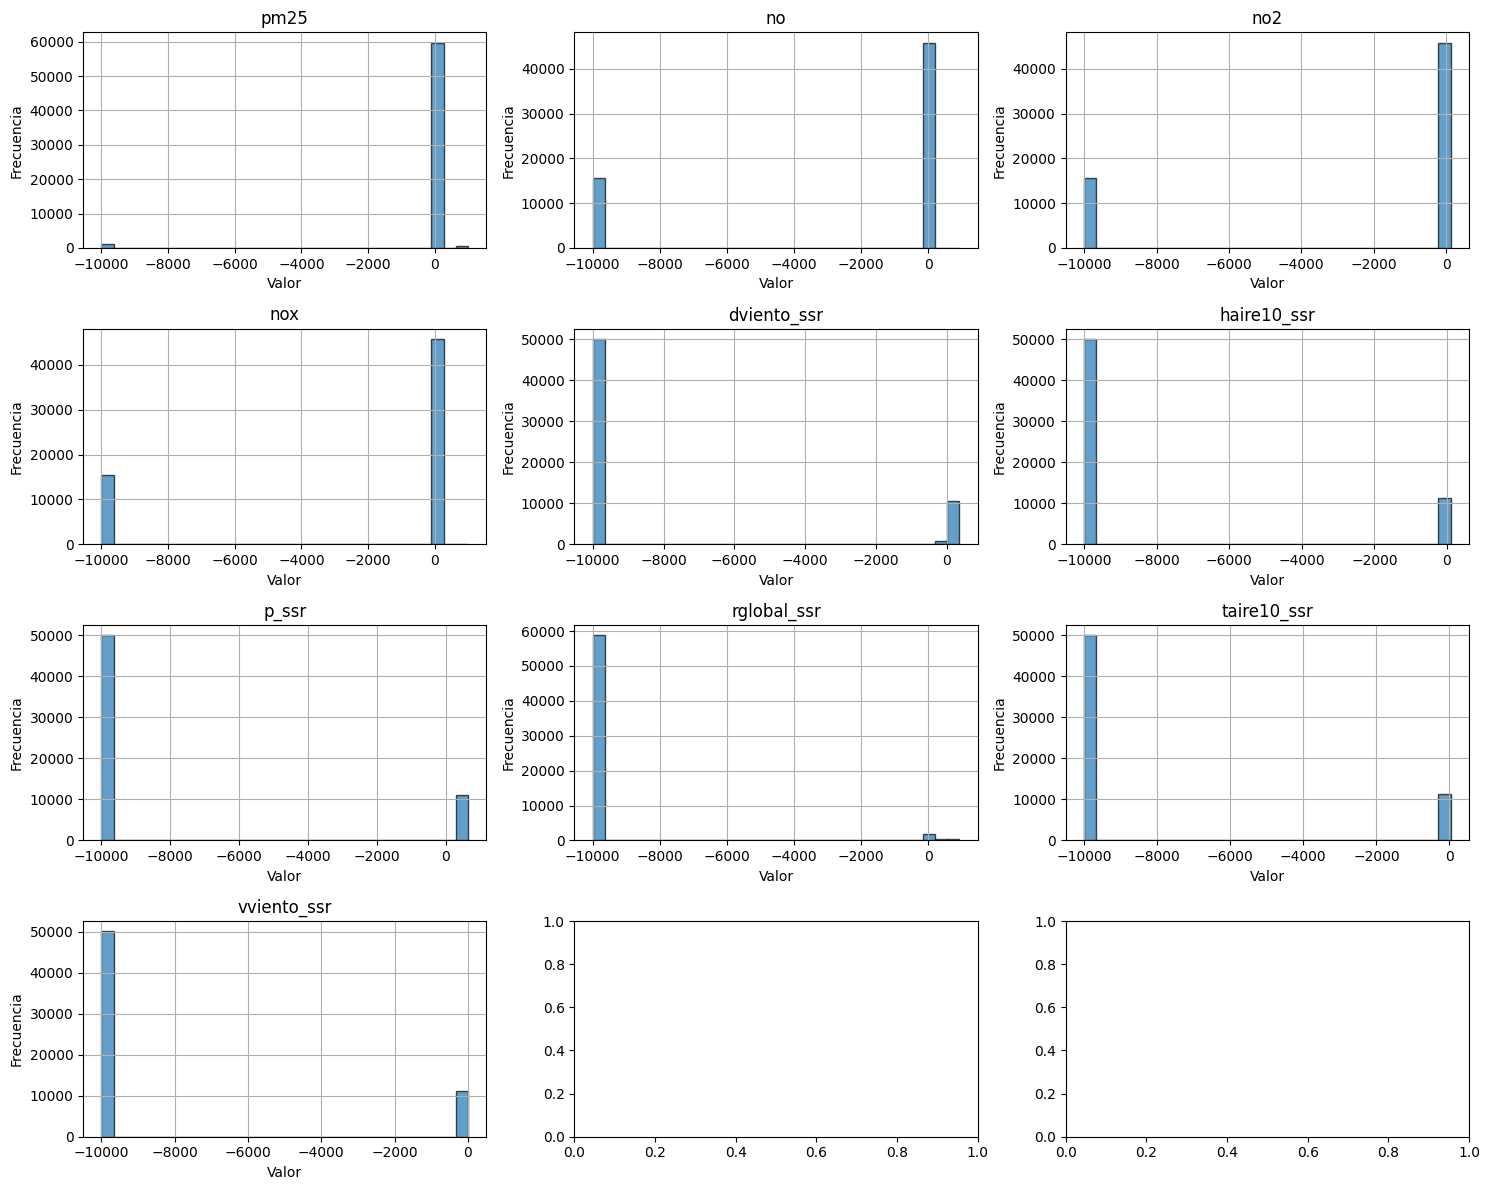

In [23]:
# Definir las columnas que queremos visualizar (excluyendo 'Fecha_Hora' ya que es una fecha)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Crear una figura con subgráficos (ajustar tamaño según cantidad de variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # 4 filas, 3 columnas

# Aplanar la matriz de ejes para iterar sobre ella fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(variables):
    if i < len(variables):  # Evitar errores si hay menos variables que subgráficos
        df_nuevo[col].dropna().astype(float).hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Luego, con diagramas de caja y bigotes.

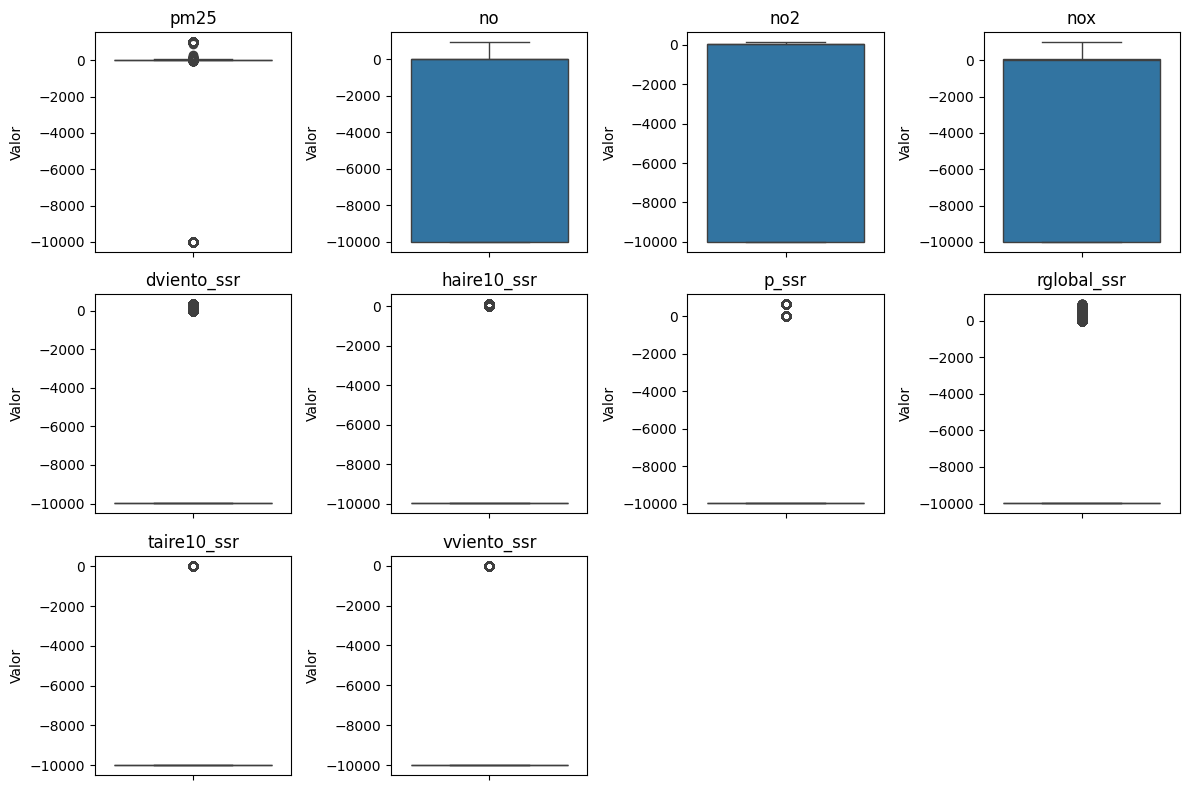

In [24]:
# Lista de variables numéricas (excluyendo Fecha_Hora)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Organiza en una cuadrícula
    sns.boxplot(y=df_nuevo[col])  
    plt.title(col)  # Título con el nombre de la variable
    plt.ylabel('Valor')

plt.tight_layout()  # Ajusta el diseño para evitar sobreposición
plt.show()

Se observan datos atípicos muy alejados de la media, que seguramente corresponden a valores faltantes codificados por el SIATA

## Llenado de nulos con la media mensual (descartando datos atípicos)

In [27]:
df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])

# Crear columnas de año y mes
df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
df_nuevo['Mes'] = df_nuevo['Fecha_Hora'].dt.month

/tmp/ipykernel_7443/1181957836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])
/tmp/ipykernel_7443/1181957836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
/tmp/ipykernel_7443/1181957836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [28]:
# Calcular el promedio de pm25 para cada mes, excluyendo valores <= 0
promedios_pm25 = df_nuevo[(df_nuevo['pm25'] > 0) & (df_nuevo['pm25']<80)].groupby(['Año', 'Mes'])['pm25'].mean()

# Función para reemplazar valores de pm25
def reemplazar_pm25(row):
    if pd.isna(row['pm25']) or row['pm25'] <= 0 or row['pm25']>40 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_pm25.get((row['Año'], row['Mes']), row['pm25'])
    return row['pm25']

In [29]:
# Aplicar la función
df_nuevo['pm25'] = df_nuevo.apply(reemplazar_pm25, axis=1)

/tmp/ipykernel_7443/3504103422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['pm25'] = df_nuevo.apply(reemplazar_pm25, axis=1)


In [30]:
# Calcular el promedio de no para cada mes, excluyendo valores <= 0
promedios_no = df_nuevo[(df_nuevo['no'] > 0) & (df_nuevo['no'] < 1000) ].groupby(['Año', 'Mes'])['no'].mean()

# Función para reemplazar valores de no
def reemplazar_no(row):
    if pd.isna(row['no']) or row['no'] <= 0 or row['no'] > 120:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no.get((row['Año'], row['Mes']), row['no'])
    return row['no']

In [31]:
# Aplicar la función
df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)

/tmp/ipykernel_7443/3827600048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)


In [32]:
# Calcular el promedio de no2 para cada mes, excluyendo valores <= 0
promedios_no2 = df_nuevo[(df_nuevo['no2'] > 0) & (df_nuevo['no2'] < 50)].groupby(['Año', 'Mes'])['no2'].mean()

# Función para reemplazar valores de pm25
def reemplazar_no2(row):
    if pd.isna(row['no2']) or row['no2'] <= 0 or row['no2'] > 75:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no2.get((row['Año'], row['Mes']), row['no2'])
    return row['no2']

In [33]:
# Aplicar la función
df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)

/tmp/ipykernel_7443/2813178918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)


In [34]:
# Calcular el promedio de nox para cada mes, excluyendo valores <= 0
promedios_nox = df_nuevo[(df_nuevo['nox'] > 0)&(df_nuevo['nox'] < 100)].groupby(['Año', 'Mes'])['nox'].mean()

# Función para reemplazar valores de nox
def reemplazar_nox(row):
    if pd.isna(row['nox']) or row['nox'] <= 0 or row['nox'] > 105:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_nox.get((row['Año'], row['Mes']), row['nox'])
    return row['nox']

In [35]:
df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)

/tmp/ipykernel_7443/2350995725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)


In [36]:
# Calcular el promedio de dviento_ssr para cada mes, excluyendo valores <= 0
promedios_dviento_ssr = df_nuevo[(df_nuevo['dviento_ssr'] > 0) & (df_nuevo['dviento_ssr'] < 0)].groupby(['Año', 'Mes'])['dviento_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_dviento_ssr(row):
    if pd.isna(row['dviento_ssr']) or row['dviento_ssr'] <= -360 or row['dviento_ssr'] > 360 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_nox.get((row['Año'], row['Mes']), row['dviento_ssr'])
    return row['dviento_ssr']

In [37]:
df_nuevo['dviento_ssr'] = df_nuevo.apply(reemplazar_dviento_ssr, axis=1)

/tmp/ipykernel_7443/395851412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['dviento_ssr'] = df_nuevo.apply(reemplazar_dviento_ssr, axis=1)


In [38]:
# Calcular el promedio de haire10_ssr para cada mes, excluyendo valores <= 0
promedios_haire10_ssr = df_nuevo[df_nuevo['haire10_ssr'] > 0].groupby(['Año', 'Mes'])['haire10_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_haire10_ssr(row):
    if pd.isna(row['haire10_ssr']) or row['haire10_ssr'] <= 0 or row['haire10_ssr'] > 100:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_haire10_ssr.get((row['Año'], row['Mes']), row['haire10_ssr'])
    return row['haire10_ssr']

df_nuevo['haire10_ssr'] = df_nuevo.apply(reemplazar_haire10_ssr, axis=1)

/tmp/ipykernel_7443/712541768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['haire10_ssr'] = df_nuevo.apply(reemplazar_haire10_ssr, axis=1)


In [39]:
# Calcular el promedio de p_ssr para cada mes, excluyendo valores <= 0
promedios_p_ssr = df_nuevo[df_nuevo['p_ssr'] > 0].groupby(['Año', 'Mes'])['p_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_p_ssr(row):
    if pd.isna(row['p_ssr']) or row['p_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_p_ssr.get((row['Año'], row['Mes']), row['p_ssr'])
    return row['p_ssr']

df_nuevo['p_ssr'] = df_nuevo.apply(reemplazar_p_ssr, axis=1)

/tmp/ipykernel_7443/3070500889.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['p_ssr'] = df_nuevo.apply(reemplazar_p_ssr, axis=1)


In [40]:
# Calcular el promedio de rglobal_ssr para cada mes, excluyendo valores <= 0
promedios_rglobal_ssr = df_nuevo[df_nuevo['rglobal_ssr'] >= 0].groupby(['Año', 'Mes'])['rglobal_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_rglobal_ssr(row):
    if pd.isna(row['rglobal_ssr']) or row['rglobal_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_rglobal_ssr.get((row['Año'], row['Mes']), row['rglobal_ssr'])
    return row['rglobal_ssr']

df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)

/tmp/ipykernel_7443/2610123270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)


In [41]:
# Calcular el promedio de taire10_ssr para cada mes, excluyendo valores <= 0
promedios_taire10_ssr = df_nuevo[df_nuevo['taire10_ssr'] > 0].groupby(['Año', 'Mes'])['taire10_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_taire10_ssr(row):
    if pd.isna(row['taire10_ssr']) or row['taire10_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_taire10_ssr.get((row['Año'], row['Mes']), row['taire10_ssr'])
    return row['taire10_ssr']

df_nuevo['taire10_ssr'] = df_nuevo.apply(reemplazar_taire10_ssr, axis=1)

/tmp/ipykernel_7443/1284412768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['taire10_ssr'] = df_nuevo.apply(reemplazar_taire10_ssr, axis=1)


In [42]:
# Calcular el promedio de vviento_ssr para cada mes, excluyendo valores <= 0
promedios_vviento_ssr = df_nuevo[df_nuevo['vviento_ssr'] >= 0].groupby(['Año', 'Mes'])['vviento_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_vviento_ssr(row):
    if pd.isna(row['vviento_ssr']) or row['vviento_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_vviento_ssr.get((row['Año'], row['Mes']), row['vviento_ssr'])
    return row['vviento_ssr']

df_nuevo['vviento_ssr'] = df_nuevo.apply(reemplazar_vviento_ssr, axis=1)

/tmp/ipykernel_7443/1295441370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['vviento_ssr'] = df_nuevo.apply(reemplazar_vviento_ssr, axis=1)


## Histograma de datos limpios

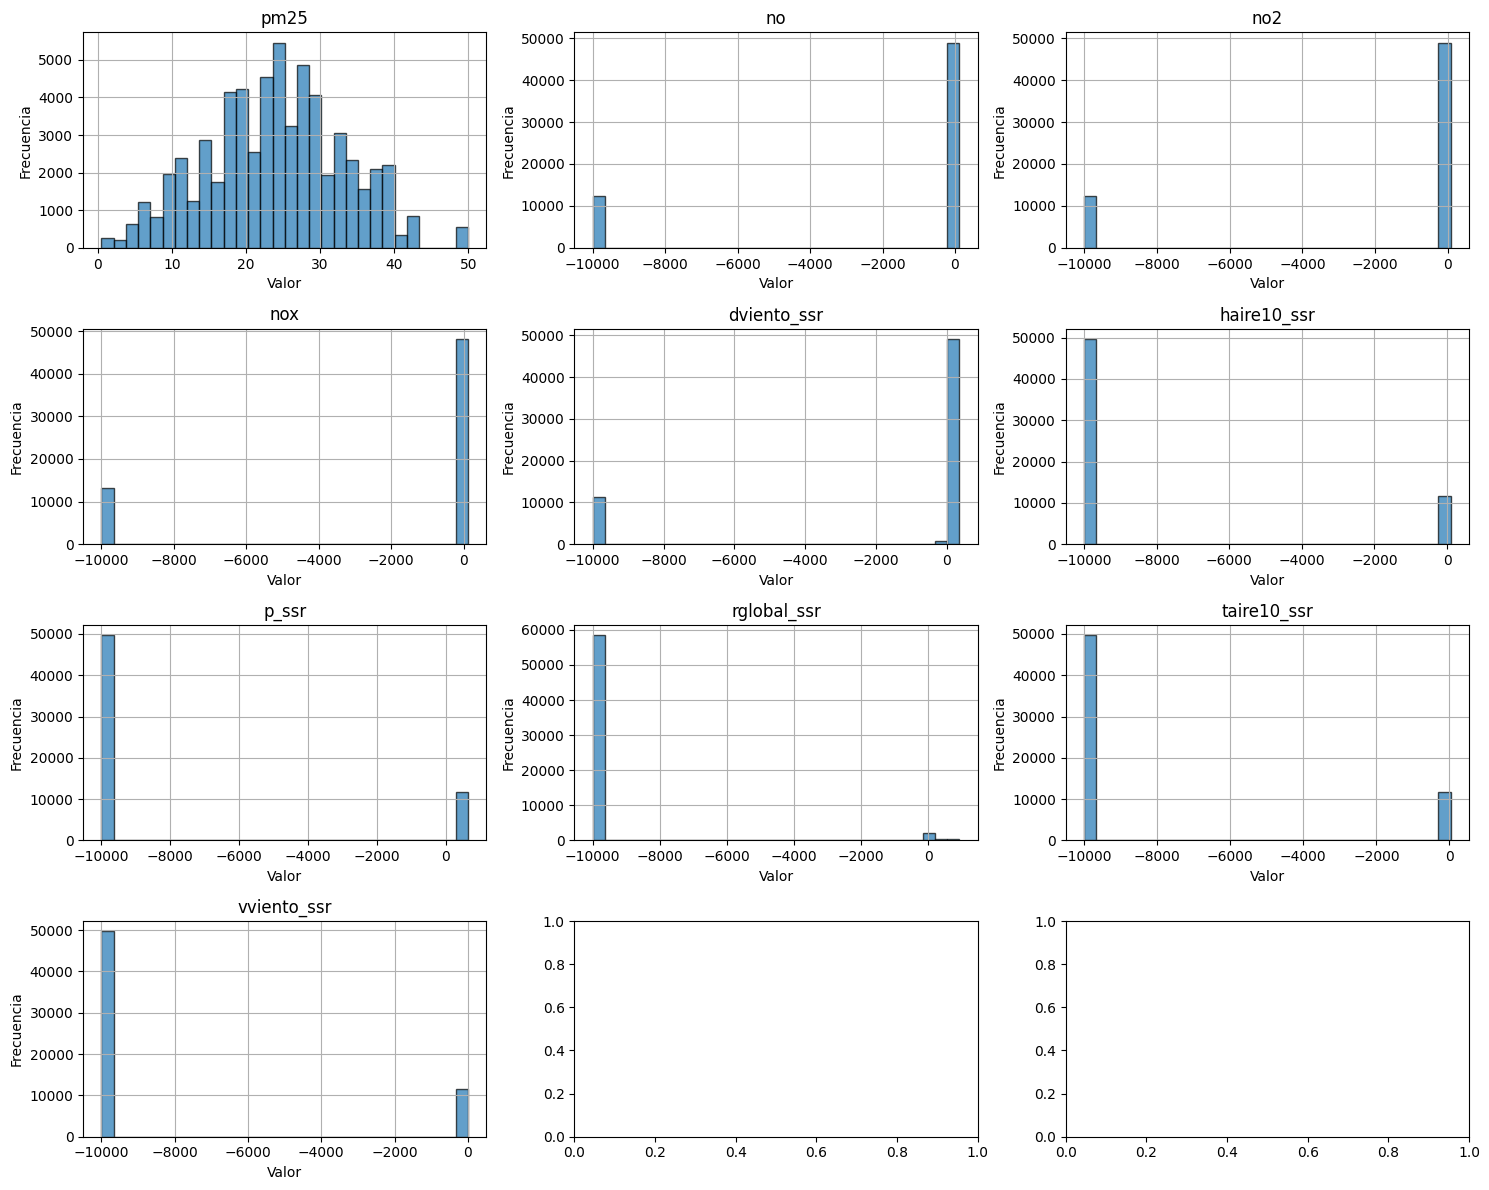

In [43]:
# Definir las columnas que queremos visualizar (excluyendo 'Fecha_Hora' ya que es una fecha)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Crear una figura con subgráficos (ajustar tamaño según cantidad de variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # 4 filas, 3 columnas

# Aplanar la matriz de ejes para iterar sobre ella fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(variables):
    if i < len(variables):  # Evitar errores si hay menos variables que subgráficos
        df_nuevo[col].dropna().astype(float).hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

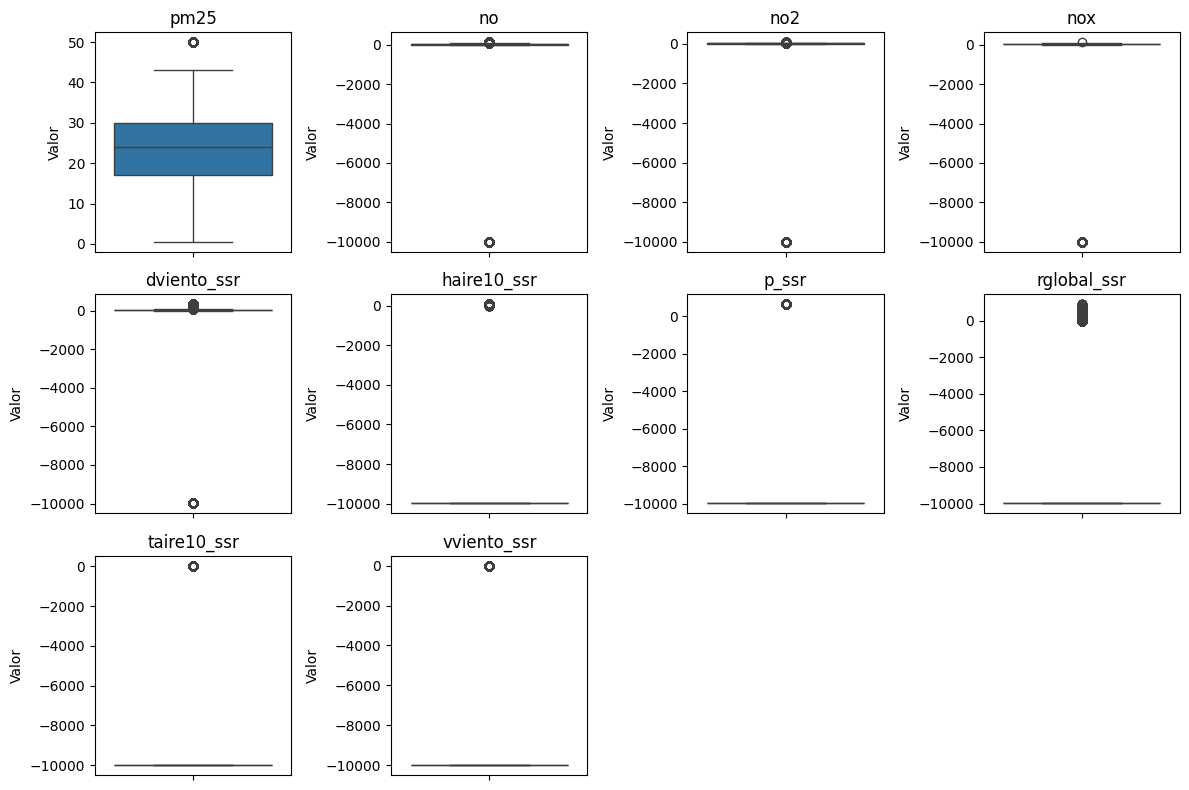

In [44]:
# Lista de variables numéricas (excluyendo Fecha_Hora)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Organiza en una cuadrícula
    sns.boxplot(y=df_nuevo[col])  
    plt.title(col)  # Título con el nombre de la variable
    plt.ylabel('Valor')

plt.tight_layout()  # Ajusta el diseño para evitar sobreposición
plt.show()

# Análisis de autocorrelaciones

In [91]:
# Eliminar filas con fechas del año 2025
df_nuevo = df_nuevo[df_nuevo["Fecha_Hora"].dt.year != 2025]

In [92]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61368 entries, 0 to 61367
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Hora   61368 non-null  datetime64[ns]
 1   pm25         61368 non-null  float64       
 2   no           61368 non-null  float64       
 3   no2          61368 non-null  float64       
 4   nox          61368 non-null  float64       
 5   dviento_ssr  61368 non-null  float64       
 6   haire10_ssr  61368 non-null  object        
 7   p_ssr        61368 non-null  object        
 8   rglobal_ssr  61368 non-null  object        
 9   taire10_ssr  61368 non-null  object        
 10  vviento_ssr  61368 non-null  object        
 11  Año          61368 non-null  int32         
 12  Mes          61368 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), object(5)
memory usage: 6.1+ MB


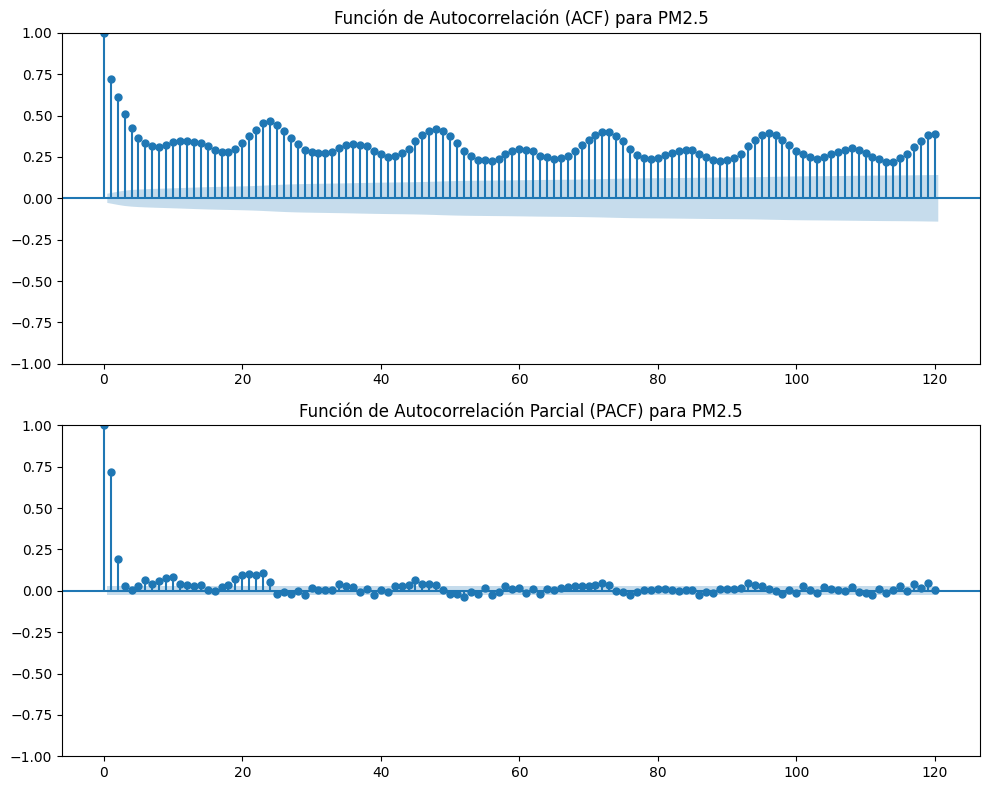

In [93]:
# Extraer la serie de PM2.5 y eliminar valores nulos
pm25 = df_nuevo["pm25"]

# Reducir la muestra si hay problemas de memoria
pm25_sampled = pm25.iloc[:5000]  # Se puede ajustar según la necesidad

# Generar gráficos de ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de ACF (Autocorrelación)
plot_acf(pm25_sampled, lags=120, ax=ax[0])
ax[0].set_title("Función de Autocorrelación (ACF) para PM2.5")

# Gráfico de PACF (Autocorrelación Parcial)
plot_pacf(pm25_sampled, lags=120, ax=ax[1])
ax[1].set_title("Función de Autocorrelación Parcial (PACF) para PM2.5")

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

In [94]:
# Seleccionar la variable PM2.5 y reducir la muestra si es necesario
pm25 = df_nuevo["pm25"].dropna().iloc[:5000]  # Se eliminan valores nulos

# Calcular los valores de ACF y PACF
acf_values = acf(pm25, nlags=120, fft=True)  # Autocorrelación
pacf_values = pacf(pm25, nlags=120, method='ywm')  # Autocorrelación parcial

# Mostrar los valores calculados
print("Valores de ACF:", acf_values)
print("\nValores de PACF:", pacf_values)

Valores de ACF: [1.         0.71996873 0.61066708 0.50749081 0.42207006 0.36302491
 0.3361657  0.31402704 0.31023778 0.32159785 0.3406774  0.34566247
 0.34707786 0.34148304 0.33639435 0.31682089 0.29487824 0.28224353
 0.27870936 0.29619174 0.33292862 0.37549373 0.41558818 0.45763669
 0.46929699 0.4415814  0.40862905 0.3653193  0.33003448 0.2914161
 0.28104772 0.2711217  0.27188824 0.2792461  0.30425816 0.31946393
 0.33082926 0.32191503 0.31353287 0.28453981 0.27044051 0.25183529
 0.25765426 0.27290251 0.30086371 0.34618317 0.38051281 0.40725008
 0.42016823 0.4074977  0.37411351 0.33590546 0.28838632 0.25863841
 0.23380215 0.23449178 0.22822479 0.23857235 0.26659703 0.28336915
 0.29674673 0.28972615 0.28438294 0.25791152 0.2467804  0.23676151
 0.24179502 0.25823092 0.28790078 0.32040075 0.35410555 0.38153238
 0.40289635 0.40335735 0.37944856 0.34461148 0.29893824 0.26341296
 0.24561028 0.23793794 0.2427806  0.25918463 0.27440081 0.28740112
 0.29366541 0.29222972 0.2689055  0.25018699 0.

## Visualización de la serie de tiempo

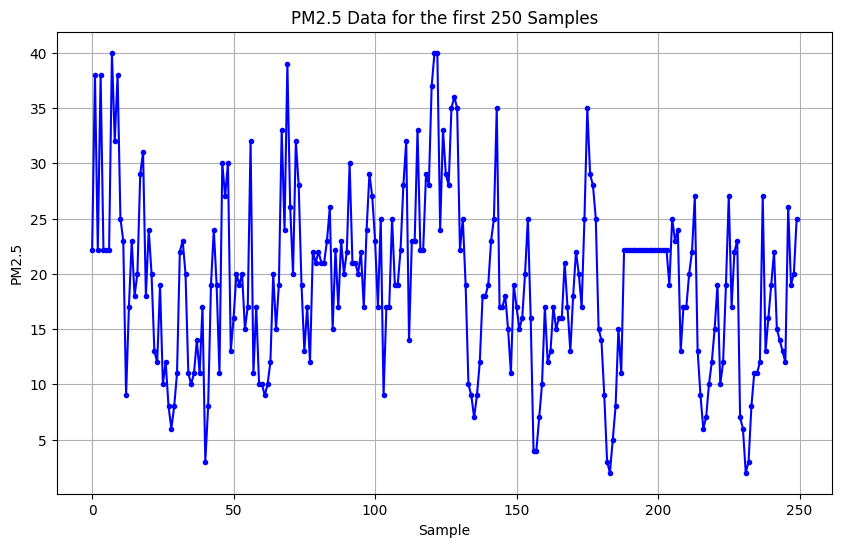

In [95]:
# Plot the PM2.5 data for the first 250 samples
plt.figure(figsize=(10, 6))
plt.plot(pm25_sampled[:250], marker='o', markersize=3, linestyle='-', color='b')
plt.title("PM2.5 Data for the first 250 Samples")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

In [96]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes'],
      dtype='object')

## Correlaciones de Spearman y Kendall

Se elige analizar la correlación entre variables con los estadísticos de Spearman y de Kendall, dado que estos son no paramétricos y no parten de la suposición de que los datos distribuyen normalmente.

In [97]:
# Spearman correlation between 'pm25' and the other columns expect 'Año' and 'Mes'
correlations_spearman = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['pm25'], method='spearman')

In [98]:
correlations_spearman

Fecha_Hora    -0.100236
pm25           1.000000
no             0.306759
no2            0.376170
nox            0.450402
dviento_ssr    0.006602
haire10_ssr    0.156191
p_ssr          0.141294
rglobal_ssr   -0.054615
taire10_ssr   -0.183337
vviento_ssr   -0.244983
dtype: float64

In [99]:
correlations_kendall = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['pm25'], method='kendall')
correlations_kendall

Fecha_Hora    -0.066444
pm25           1.000000
no             0.210500
no2            0.259398
nox            0.314485
dviento_ssr    0.003193
haire10_ssr    0.107556
p_ssr          0.096343
rglobal_ssr   -0.036822
taire10_ssr   -0.126331
vviento_ssr   -0.169447
dtype: float64

## Análisis de correlación entre PM2.5 y valores rezagados de otras variables

Este análisis se hace con el fin de visualizar la influencia que tienen valores previos de PM2.5, otros contaminantes y variables meteorológicas sobre los valores presentes de PM2.5

/tmp/ipykernel_30521/3304149013.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
/tmp/ipykernel_30521/3304149013.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
/tmp/ipykernel_30521/3304149013.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

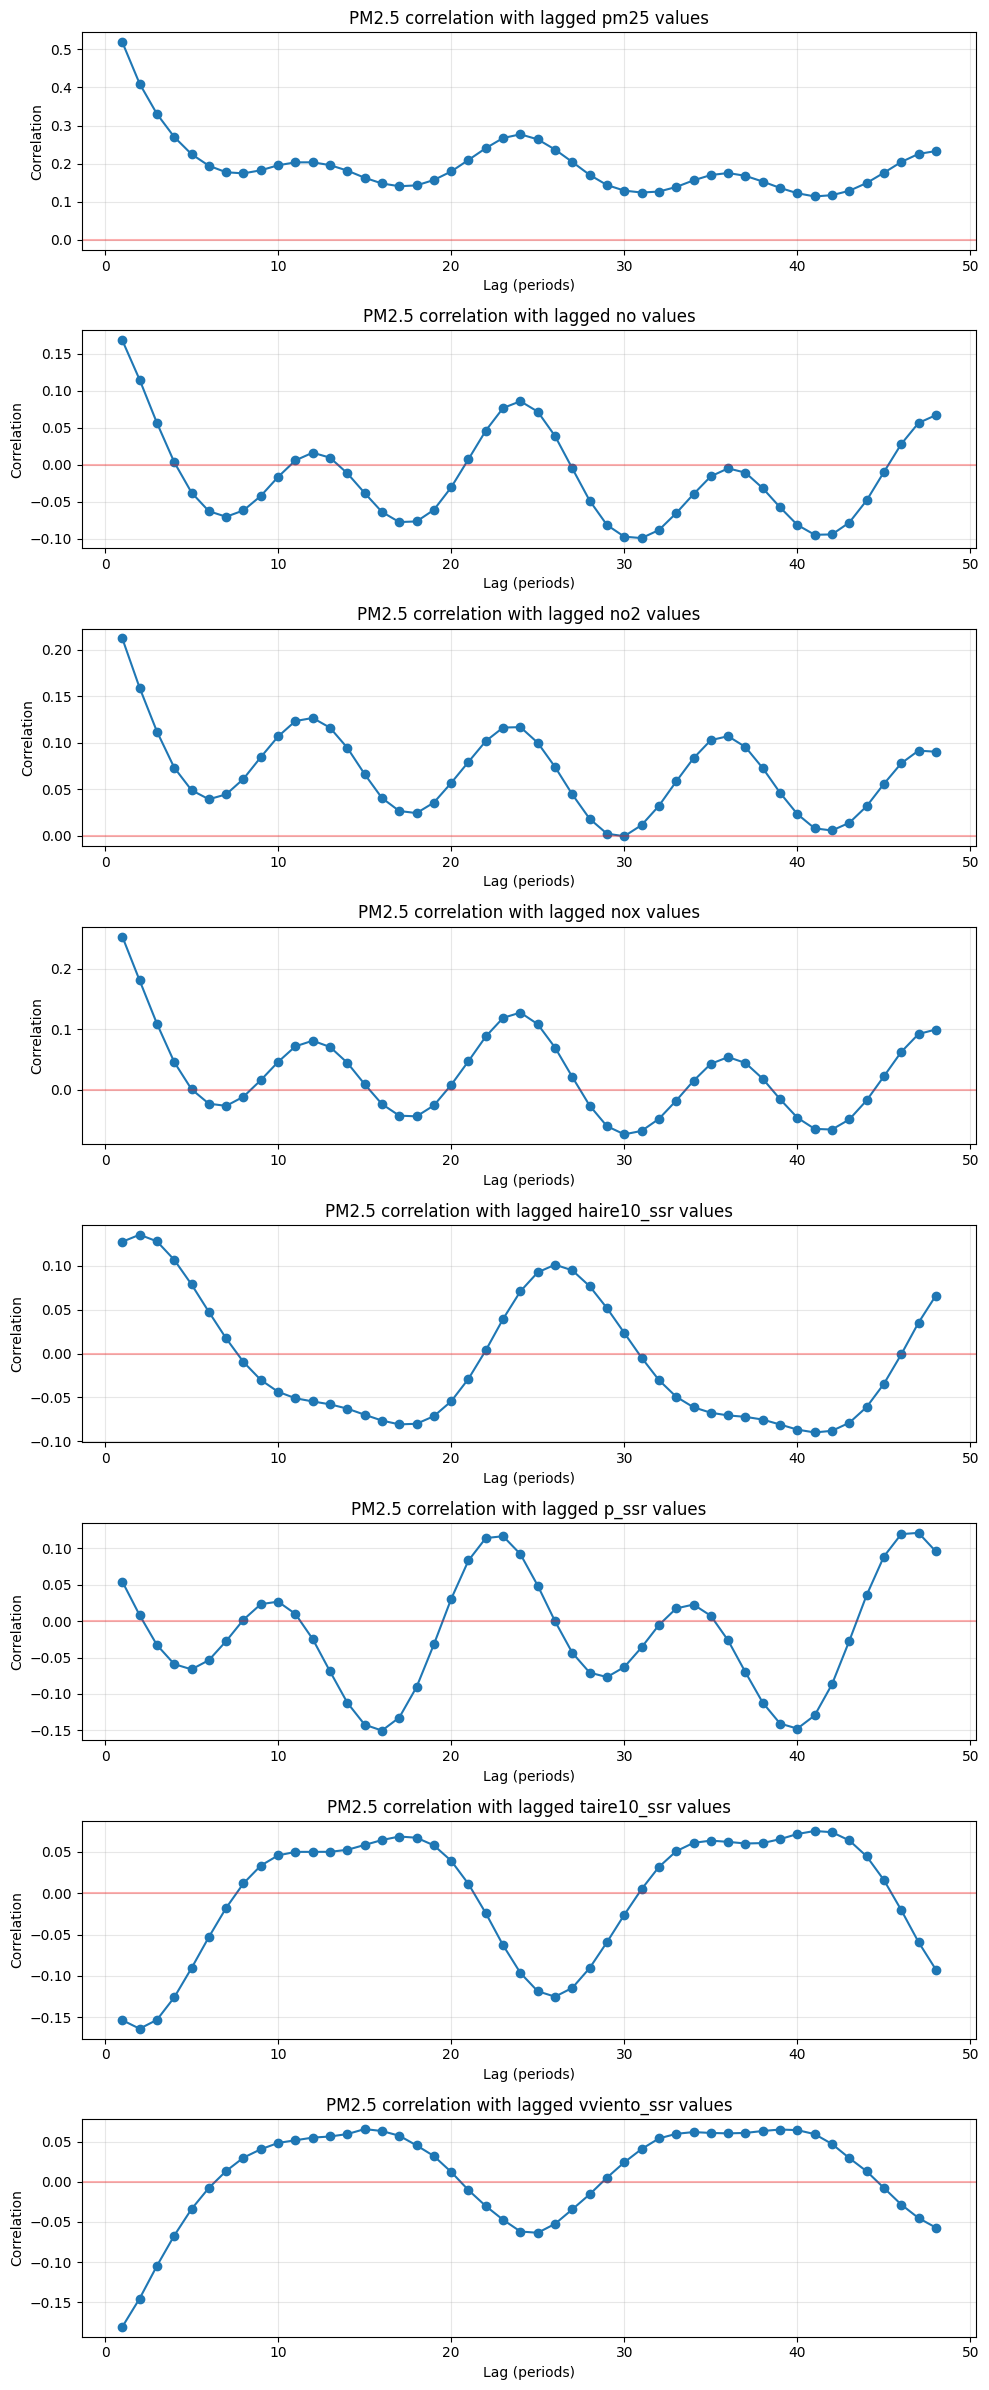

In [100]:
variables = ['pm25', 'no', 'no2', 'nox', 'haire10_ssr', 'p_ssr',
             'taire10_ssr', 'vviento_ssr']
max_lag = 48  # Maximum lag to consider

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 3 * len(variables)))

for i, variable in enumerate(variables):
    lag_correlations = []
    for lag in range(1, max_lag + 1):
        df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
        # Calculate correlation, ignoring NaN values
        corr = df_nuevo['pm25'].corr(df_nuevo[f'{variable}_lag{lag}'], method='kendall')
        lag_correlations.append((lag, corr))
    
    # Plot in the corresponding subplot
    lags, corrs = zip(*lag_correlations)
    axes[i].plot(lags, corrs, marker='o')
    axes[i].axhline(y=0, color='r', linestyle='-', alpha=0.3)
    axes[i].set_xlabel('Lag (periods)')
    axes[i].set_ylabel('Correlation')
    axes[i].set_title(f'PM2.5 correlation with lagged {variable} values')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clean up the lagged columns
df_nuevo.drop(columns=[f'{variable}_lag{lag}' for variable in variables for lag in range(1, max_lag + 1)], inplace=True)


Para el entrenamiento del modelo predictivo, se decide agregar al conjunto de variables de entrada el valor de estas rezagado hacia atrás de 1 a 6 horas, 12 y 24 horas

In [101]:
# Lista de columnas que quieres expandir con valores anteriores
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr', 
             'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Agregar 6 columnas para cada variable con valores de registros anteriores
for var in variables:
    for i in [1,2,3,4,5,6,12,24]:  # 1 hasta 6 registros anteriores
        df_nuevo[f'{var}_lag{i}'] = df_nuevo[var].shift(i)

# Ver las primeras filas del dataframe con las nuevas columnas
print(df.head())

            Fecha_Hora  pm25 calidad_pm25       no calidad_no      no2  \
0  2018-01-01 00:00:00  42.0          1.0  22.8438        1.0  16.5963   
1  2018-01-01 01:00:00  38.0          1.0   2.6975        1.0  13.4904   
2  2018-01-01 02:00:00  53.0          1.0  4.72986        1.0  15.2611   
3  2018-01-01 03:00:00  38.0          1.0  3.08167        1.0  13.7399   
4  2018-01-01 04:00:00  47.0          1.0  5.62889        1.0  15.2401   

  calidad_no2      nox calidad_nox dviento_ssr  ... haire10_ssr  \
0         1.0  39.4463         1.0     6.92989  ...     74.9315   
1         1.0   16.189         1.0     323.503  ...     77.5025   
2         1.0  19.9911         1.0     331.834  ...     78.9618   
3         1.0  16.8242         1.0     324.642  ...     79.5796   
4         1.0  20.8768         1.0     1.63179  ...     79.2826   

  calidad_haire10_ssr    p_ssr calidad_p_ssr rglobal_ssr calidad_rglobal_ssr  \
0                 1.0  637.431           1.0         0.0                

In [102]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes',
       'pm25_lag1', 'pm25_lag2', 'pm25_lag3', 'pm25_lag4', 'pm25_lag5',
       'pm25_lag6', 'pm25_lag12', 'pm25_lag24', 'no_lag1', 'no_lag2',
       'no_lag3', 'no_lag4', 'no_lag5', 'no_lag6', 'no_lag12', 'no_lag24',
       'no2_lag1', 'no2_lag2', 'no2_lag3', 'no2_lag4', 'no2_lag5', 'no2_lag6',
       'no2_lag12', 'no2_lag24', 'nox_lag1', 'nox_lag2', 'nox_lag3',
       'nox_lag4', 'nox_lag5', 'nox_lag6', 'nox_lag12', 'nox_lag24',
       'dviento_ssr_lag1', 'dviento_ssr_lag2', 'dviento_ssr_lag3',
       'dviento_ssr_lag4', 'dviento_ssr_lag5', 'dviento_ssr_lag6',
       'dviento_ssr_lag12', 'dviento_ssr_lag24', 'haire10_ssr_lag1',
       'haire10_ssr_lag2', 'haire10_ssr_lag3', 'haire10_ssr_lag4',
       'haire10_ssr_lag5', 'haire10_ssr_lag6', 'haire10_ssr_lag12',
       'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag2', 'p_ssr_lag3',
    

In [103]:
df_nuevo.drop(['Año', 'Mes'],inplace=True, axis=1)

In [104]:
df_nuevo.to_csv('28_datos_procesados.csv', index=False)